Các mô hình sử dụng (các bộ phân loại)

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
]

Kết quả thực nghiệm dữ liệu với PCA

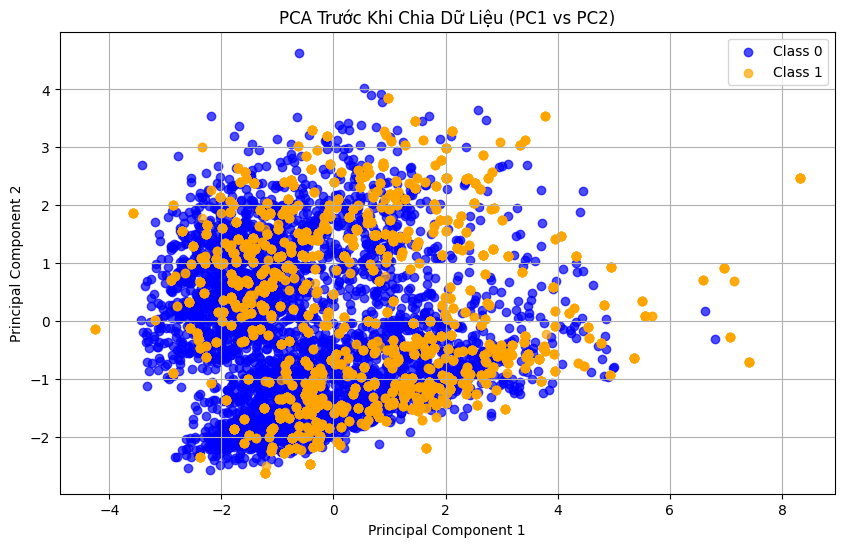

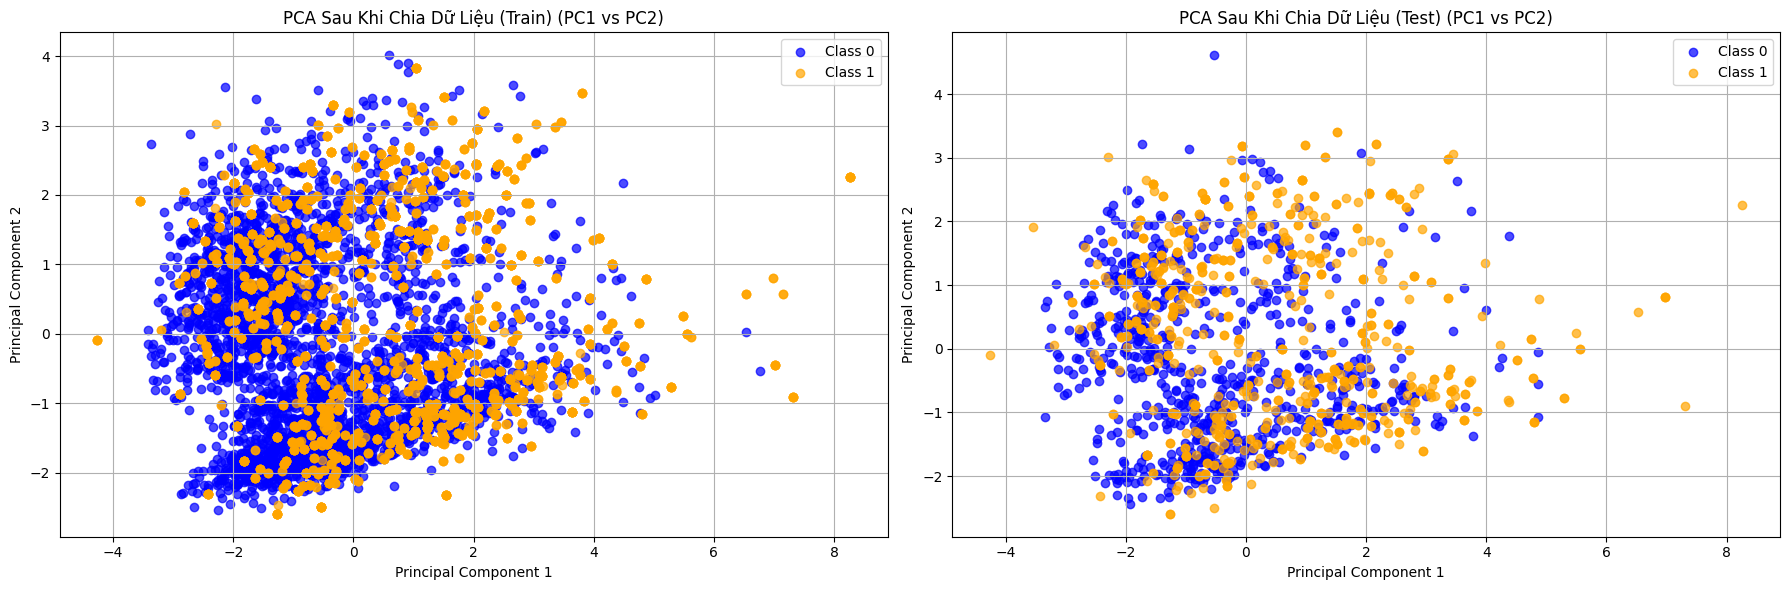

In [3]:
from pca_function import PCA_Processor
processor = PCA_Processor(data_path="../data/framingham.csv", target_column="TenYearCHD", n_components=2)
processor.visualize_pca_2d_cases()

Kết quả thực nghiệm dữ liệu với UMAP

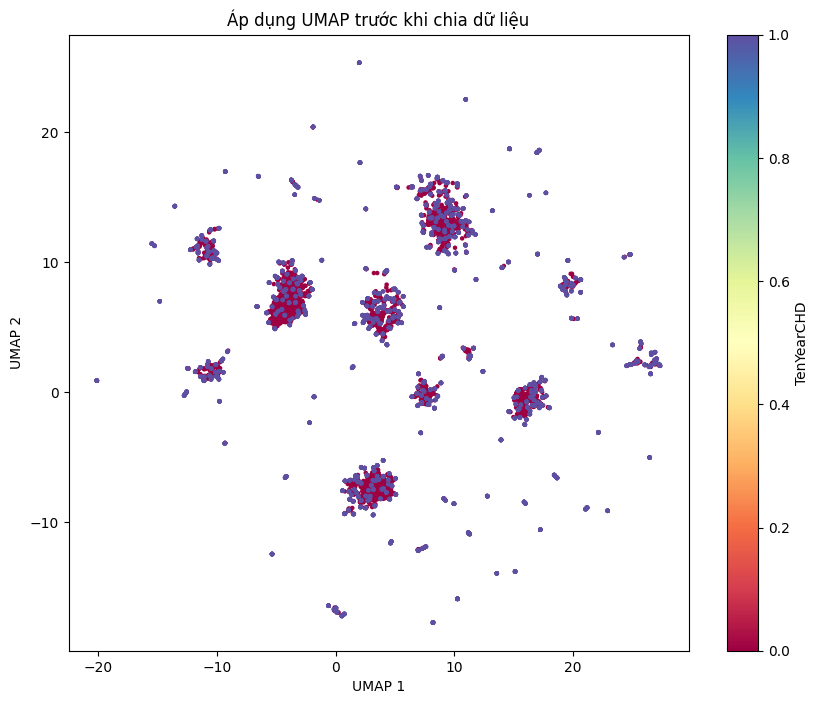

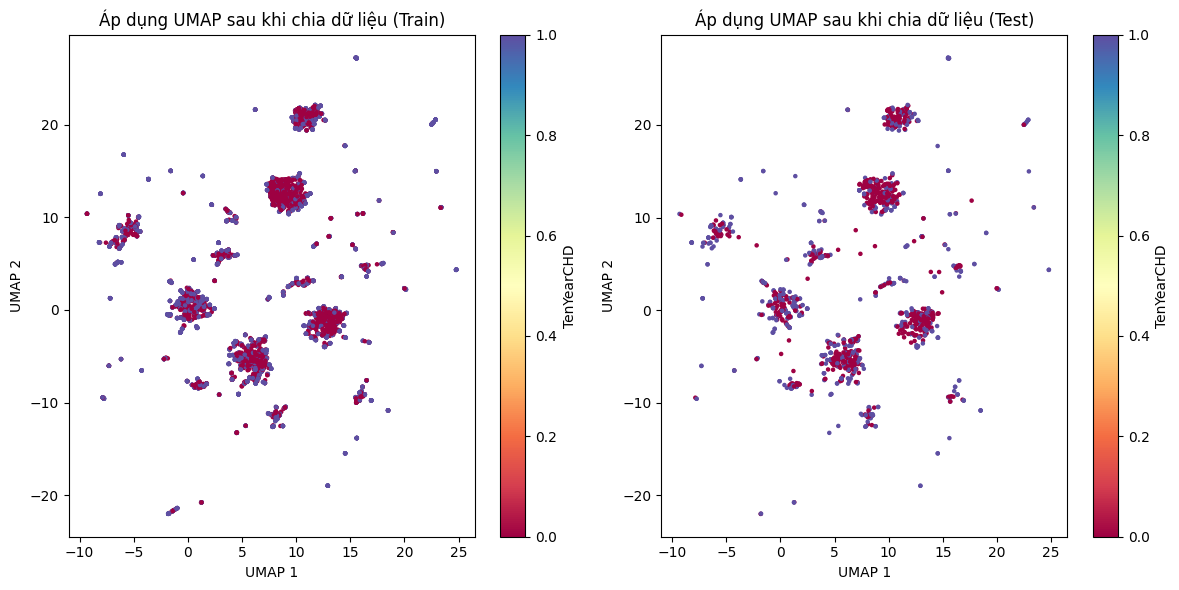

In [2]:
from umap_function import UMAP_Processor

# Khởi tạo UMAP_Processor
umap_processor = UMAP_Processor(
    data_path='../data/framingham.csv',  
    target_column='TenYearCHD',  
    n_components=2,  
    test_size=0.2,  # Tỷ lệ dữ liệu dùng để thử nghiệm
    random_state=42  # Hạt giống cho phép lặp lại các kết quả
)

results_umap_before = umap_processor.apply_umap_before_split([], show_plots=True)  
results_umap_after = umap_processor.apply_umap_after_split([], show_plots=True)  

Phân cụm với Kmeans

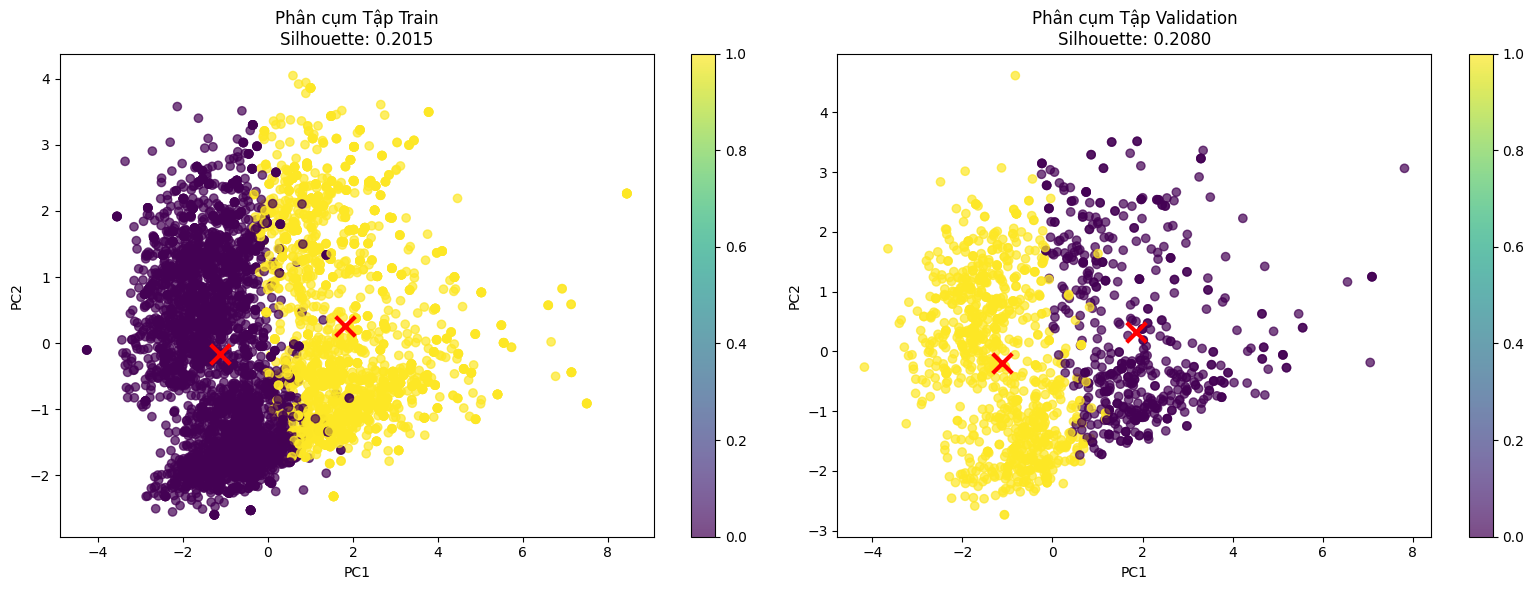


--- BÁO CÁO PHÂN LOẠI PHÂN CỤM ---
Silhouette Tập Train: 0.2015
Silhouette Tập Validation: 0.2080
Độ chính xác Tập Train: 0.6115
Độ chính xác Tập Validation: 0.4003

Phân phối nhãn cụm:
Tập Train:
(array([0, 1], dtype=int32), array([3562, 2191]))
Tập Validation:
(array([0, 1], dtype=int32), array([544, 895]))

Classification Report: Validation
              precision    recall  f1-score   support

           0       0.38      0.28      0.33       735
           1       0.41      0.52      0.46       704

    accuracy                           0.40      1439
   macro avg       0.40      0.40      0.39      1439
weighted avg       0.40      0.40      0.39      1439



In [1]:
from kmeans_function import KMeansClusterer
def main():
    data_path = '../data/framingham.csv'
    target_column = 'TenYearCHD'
    # Tạo đối tượng KMeansClusterer
    clusterer = KMeansClusterer(data_path, target_column)
    train_labels, val_labels, kmeans_train, kmeans_val = clusterer.perform_clustering(
        n_clusters=2,   
        save_plot=False  
    )
main()

Training 2 models with PCA

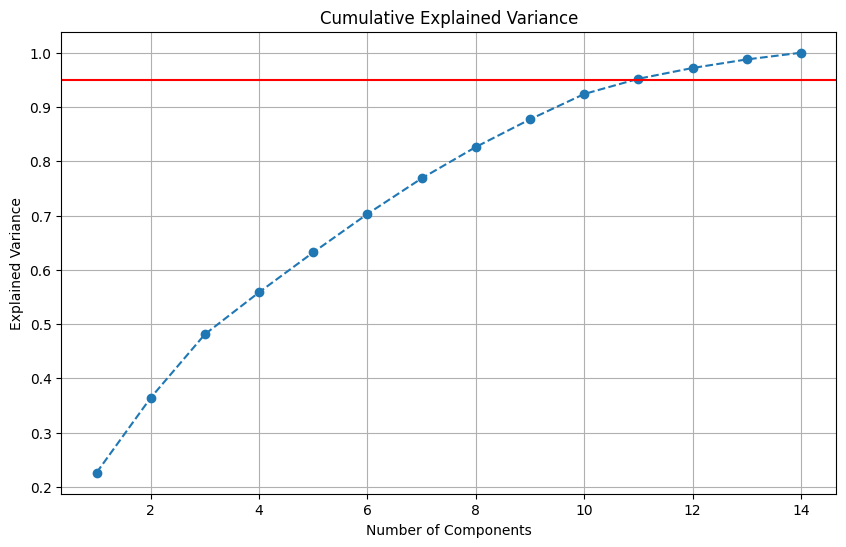

Number of components to retain 95.0% variance: 11
Accuracy KNeighborsClassifier     0.7874    

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       735
           1       0.72      0.92      0.81       704

    accuracy                           0.79      1439
   macro avg       0.81      0.79      0.78      1439
weighted avg       0.81      0.79      0.78      1439


Confusion Matrix for KNeighborsClassifier:
[[485 250]
 [ 56 648]]
Accuracy GaussianNB               0.6095    

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       735
           1       0.71      0.34      0.46       704

    accuracy                           0.61      1439
   macro avg       0.64      0.60      0.58      1439
weighted avg       0.64      0.61      0.58      1439


Confusion Matrix for GaussianNB:
[[635 100]
 [462 

In [6]:
from pca_function import PCA_Processor
from pca_function import print_results

pca_processor = PCA_Processor(
    data_path='../data/framingham.csv',  # Đường dẫn đến file dữ liệu
    target_column='TenYearCHD',  # Cột mục tiêu
    n_components=2,  # Số chiều sau khi giảm chiều
    test_size=0.2,  # Tỷ lệ dữ liệu dùng để thử nghiệm
    random_state=42  # Hạt giống cho phép lặp lại các kết quả
)

# Số chiều tối ưu cần giữ lại để đạt phương sai 95%
optimal_components = pca_processor.select_pca_components(variance_threshold=0.95)
# Áp dụng số chiều vào dữ liệu
pca_processor.n_components = optimal_components

results_pca_before = pca_processor.apply_pca_before_split(classifiers)
print_results(results_pca_before)

Training 2 models with UMAP

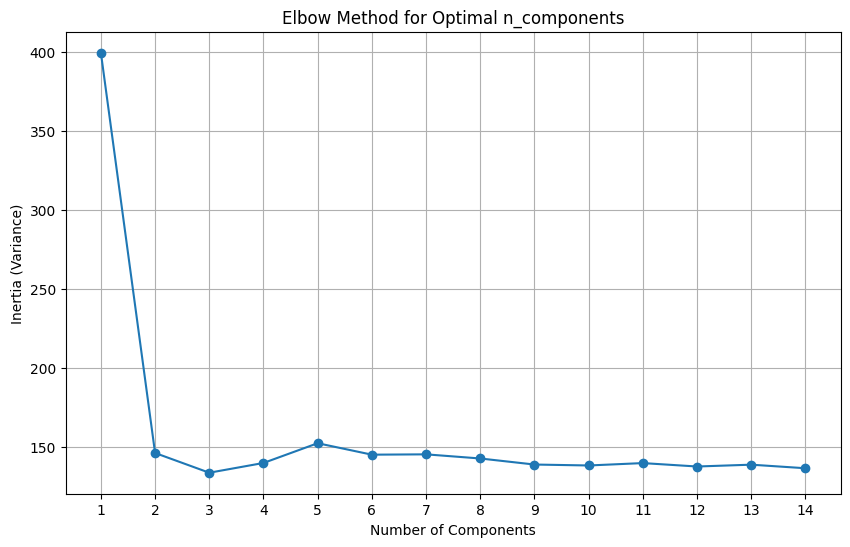

Optimal number of dimensions: 4
Accuracy KNeighborsClassifier     0.7929    

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       735
           1       0.73      0.91      0.81       704

    accuracy                           0.79      1439
   macro avg       0.81      0.80      0.79      1439
weighted avg       0.81      0.79      0.79      1439


Confusion Matrix for KNeighborsClassifier:
[[502 233]
 [ 65 639]]
Accuracy GaussianNB               0.5879    

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       735
           1       0.59      0.54      0.56       704

    accuracy                           0.59      1439
   macro avg       0.59      0.59      0.59      1439
weighted avg       0.59      0.59      0.59      1439


Confusion Matrix for GaussianNB:
[[466 269]
 [324 380]]


In [3]:
from umap_function import UMAP_Processor
from umap_function import print_results 

# Tìm số chiều tối ưu
umap_processor.find_optimal_n_components_elbow(max_components=14)

# Khởi tạo UMAP_Processor
umap_processor = UMAP_Processor(
    data_path='../data/framingham.csv',  
    target_column='TenYearCHD', 
    n_components=2,  # Số chiều sau khi giảm chiều
    test_size=0.2,  # Tỷ lệ dữ liệu dùng để thử nghiệm
    random_state=42  # Hạt giống cho phép lặp lại các kết quả
)
results_umap_before = umap_processor.apply_umap_before_split(classifiers, show_plots=False)
print_results(results_umap_before)